<h1 style="font-size:36px;">CNN-LSTM</h1>

CNN-LSTM is a deep learning model that combines both Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) architectures. This model is used in the analysis of temporal data (eg time series). CNN layers apply convolution operations to extract the features of the input data, while LSTM layers keep the information from the past time periods of the data in memory and use it for future predictions. In this way, the CNN-LSTM model can make more accurate predictions by capturing both the characteristics of temporal data and information from past time periods. The CNN-LSTM model gives very successful results in applications where temporal data such as Bitcoin price estimation are used.

CNN-LSTM, hem evrişimli sinir ağı (Convolutional Neural Network - CNN) hem de uzun-kısa süreli bellek (Long Short-Term Memory - LSTM) mimarilerinin birleştirilmesiyle oluşan bir derin öğrenme modelidir. Bu model, zamansal verilerin (örneğin zaman serileri) analizinde kullanılır. CNN katmanları, girdi verilerinin özelliklerini çıkarmak için evrişim işlemleri uygular, LSTM katmanları ise verilerin geçmiş zaman dilimlerindeki bilgilerini hafızasında tutarak gelecekteki tahminler için kullanır. Bu şekilde, CNN-LSTM modeli hem zamansal verilerin özelliklerini hem de geçmiş zaman dilimlerindeki bilgileri yakalayarak daha doğru tahminler yapabilir. Bitcoin fiyatı tahminleme gibi zamansal verilerin kullanıldığı uygulamalarda CNN-LSTM modeli oldukça başarılı sonuçlar vermektedir.


<h1 style="font-size:15px;">Summary of the Model</h1>

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 2, 26, 32)        192       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 2, 22, 32)        5152      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 2, 11, 32)        0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 2, 352)           0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 200)               4

This model is a CNN-LSTM model with a Conv1D layer followed by an LSTM layer followed by two dense layers. The two Conv1D layers are used to learn the properties of the data, while the MaxPooling1D layer reduces the size of the feature maps and reduces computational cost by removing redundant information. The LSTM layer is used to predict the next value, taking into account the timing of historical data. Dense layers are used to give the model a higher learning capacity.

The first layer of the model is the Conv1D layer with the TimeDistributed wrapper. This layer ensures that the same Conv1D weights are used at each time step of the input data. The second layer is also a Conv1D layer. This layer is used in conjunction with a MaxPooling1D layer to reduce the size of feature maps. The Flatten layer then flattens the data to prepare it for entry into the LSTM layer.

The LSTM layer predicts the next output by remembering previous inputs of time series data. Dense layers provide a higher learning capacity and help the model make more accurate predictions. In the last layer, an output value is produced. This model is designed to be used in problems such as time series estimation.


Bu model, bir Conv1D katmanı ardından bir LSTM katmanı ve ardından iki yoğun katmanı içeren bir CNN-LSTM modelidir. İki adet Conv1D katmanı, verilerin özelliklerini öğrenmek için kullanılırken, MaxPooling1D katmanı, özellik haritalarının boyutunu küçültür ve gereksiz bilgiyi çıkararak hesaplama maliyetini azaltır. LSTM katmanı, geçmiş verilerin zamanlamasını dikkate alarak bir sonraki değeri tahmin etmek için kullanılır. Yoğun katmanlar, modele daha yüksek bir öğrenme kapasitesi kazandırmak için kullanılır.

Modelin ilk katmanı TimeDistributed sarmalayıcısı ile Conv1D katmanıdır. Bu katman, girdi verilerinin her bir zaman adımında aynı Conv1D ağırlıklarının kullanılmasını sağlar. İkinci katman da bir Conv1D katmanıdır. Bu katman, özellik haritalarının boyutunu küçültmek için bir MaxPooling1D katmanı ile birlikte kullanılır. Daha sonra Flatten katmanı, verileri düzleştirerek LSTM katmanına giriş için hazırlar.

LSTM katmanı, zaman serisi verilerinin önceki girdilerini anımsayarak bir sonraki çıktıyı tahmin eder. Yoğun katmanlar, daha yüksek bir öğrenme kapasitesi sağlar ve modelin daha doğru tahminler yapmasına yardımcı olur. Son katmanda, bir çıktı değeri üretilir. Bu model, zaman serileri tahminleme gibi problemlerde kullanılmak üzere tasarlanmıştır.

<h1 style="font-size:15px;">Model Outputs</h1>

In [39]:
print(CNNLSTM_ERROR)

         MSE        RMSE         MAE       R2
2.780430e+07 5272.978648 4450.642848 0.852041


<h1 style="font-size:15px;">Model Outputs</h1>

In [2]:
#import libraries
import math

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Conv1D, MaxPooling1D, TimeDistributed
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [3]:
#importing the btc data
df=pd.read_csv('btcusd.csv')
df
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3145,2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719,29340.261719,17544464887
3146,2023-04-29,29336.566406,29452.455078,29088.042969,29248.488281,29248.488281,10662634333
3147,2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641,29268.806641,14652199272
3148,2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976


In [4]:
#get the number of rows and columns in the data set
df.shape

(3150, 7)

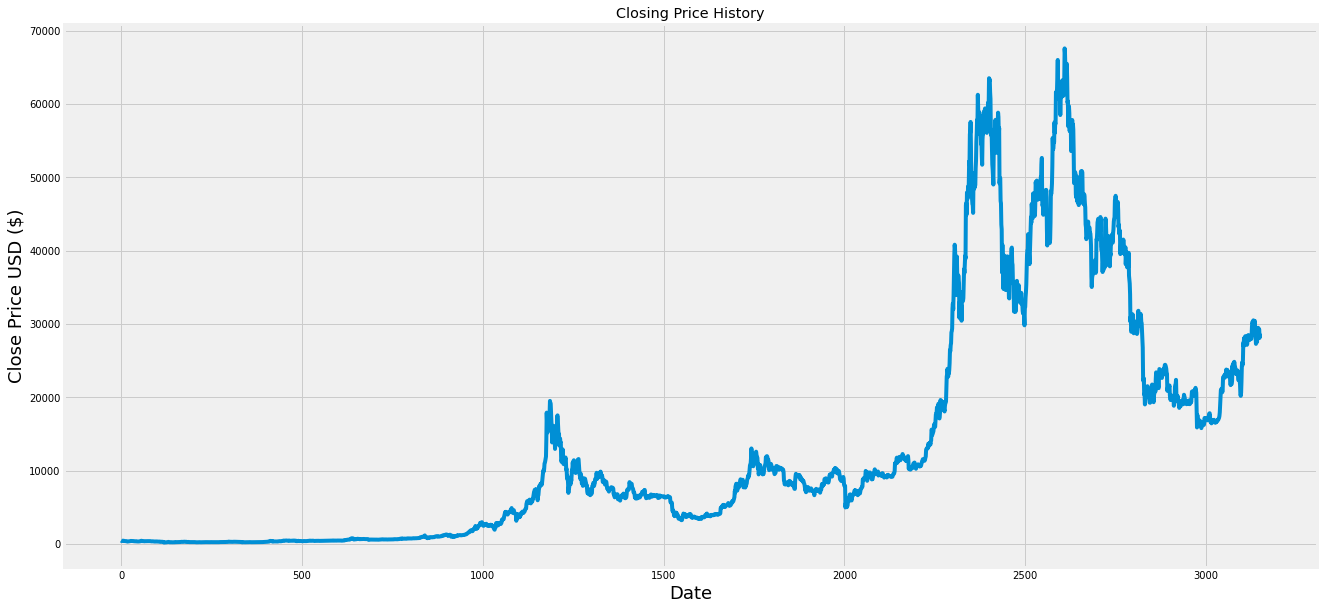

In [26]:
#visualize the closing price history
plt.figure(figsize=(20,10))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

2520

In [7]:
#Scale the data (normalization - better performance)
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.43168503],
       [0.41421566],
       [0.42289994]])

In [8]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686991635463]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

In [9]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data (CNN-LSTM expects 4 dimentionals - 2 months of 30 days, total 60 days)
x_train = np.reshape(x_train, (x_train.shape[0], 2, 30, 1))
x_train.shape

(2460, 2, 30, 1)

In [10]:
#build CNN-LSTM model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(None, 1, 1))))
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))


In [11]:
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=20)
model.summary()

Epoch 1/20
2460/2460 [==============================] - 10s 4ms/step - loss: 0.0033
Epoch 2/20
2460/2460 [==============================] - 9s 4ms/step - loss: 0.0011
Epoch 3/20
2460/2460 [==============================] - 9s 4ms/step - loss: 0.0011
Epoch 4/20
2460/2460 [==============================] - 9s 4ms/step - loss: 8.9001e-04
Epoch 5/20
2460/2460 [==============================] - 9s 4ms/step - loss: 9.8111e-04
Epoch 6/20
2460/2460 [==============================] - 9s 4ms/step - loss: 6.7056e-04
Epoch 7/20
2460/2460 [==============================] - 9s 4ms/step - loss: 5.7808e-04
Epoch 8/20
2460/2460 [==============================] - 9s 4ms/step - loss: 5.3199e-04
Epoch 9/20
2460/2460 [==============================] - 9s 4ms/step - loss: 5.4330e-04
Epoch 10/20
2460/2460 [==============================] - 9s 4ms/step - loss: 5.3462e-04
Epoch 11/20
2460/2460 [==============================] - 9s 4ms/step - loss: 5.2416e-04
Epoch 12/20
2460/2460 [=============================

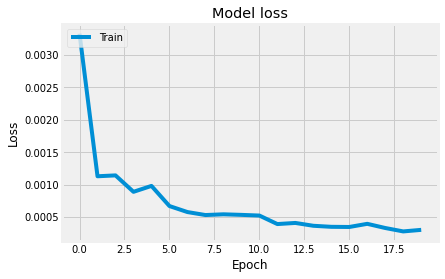

In [13]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
#create the testing data set
#create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], 2, 30, 1))
x_test.shape

(630, 2, 30, 1)

In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 2ms/step


In [35]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MSE = mean_squared_error(y_test,predictions   )
MSE

27804303.822831307

In [31]:
RMSE =np.sqrt(MSE)
RMSE

5272.978648053802

In [37]:
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
MAE = mean_absolute_error(y_test, predictions)
print(mae)

4450.642847799405


In [33]:
R2= r2_score( y_test, predictions)
R2

0.8520414410612578

In [38]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNNLSTM_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNNLSTM_ERROR = CNNLSTM_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNNLSTM_ERROR)

         MSE        RMSE         MAE       R2
2.780430e+07 5272.978648 4450.642848 0.852041


In [20]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

15.300170453891873


<ipython-input-27-2d3135804f7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


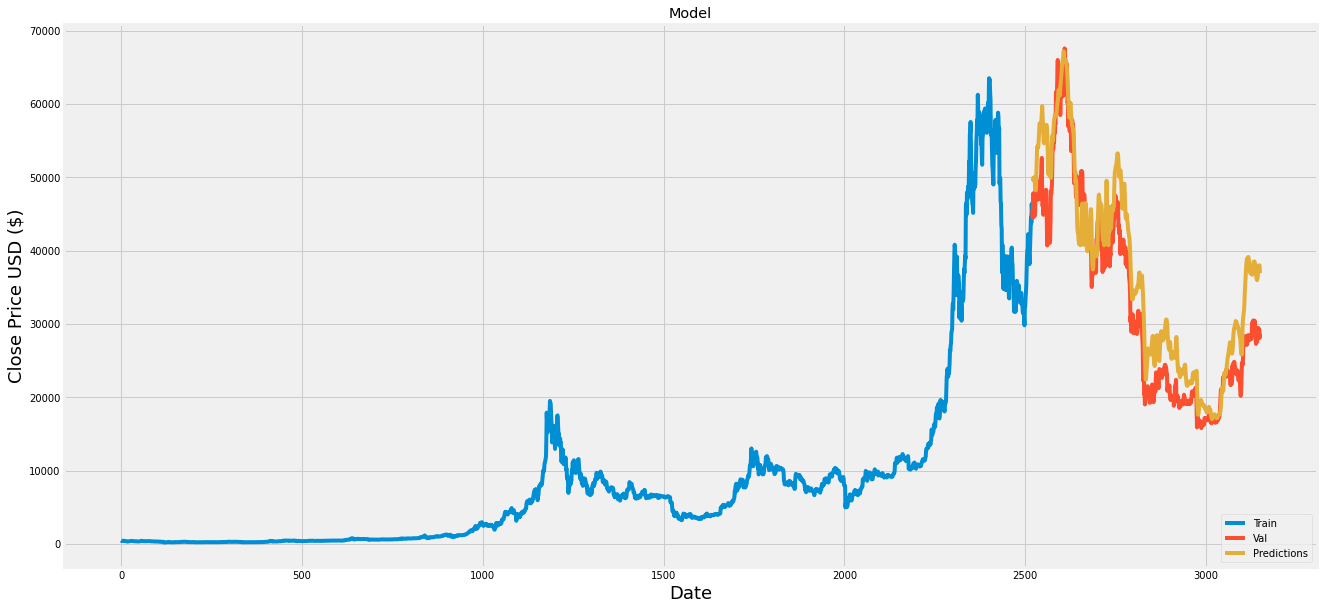

In [27]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-28-19d935e55494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


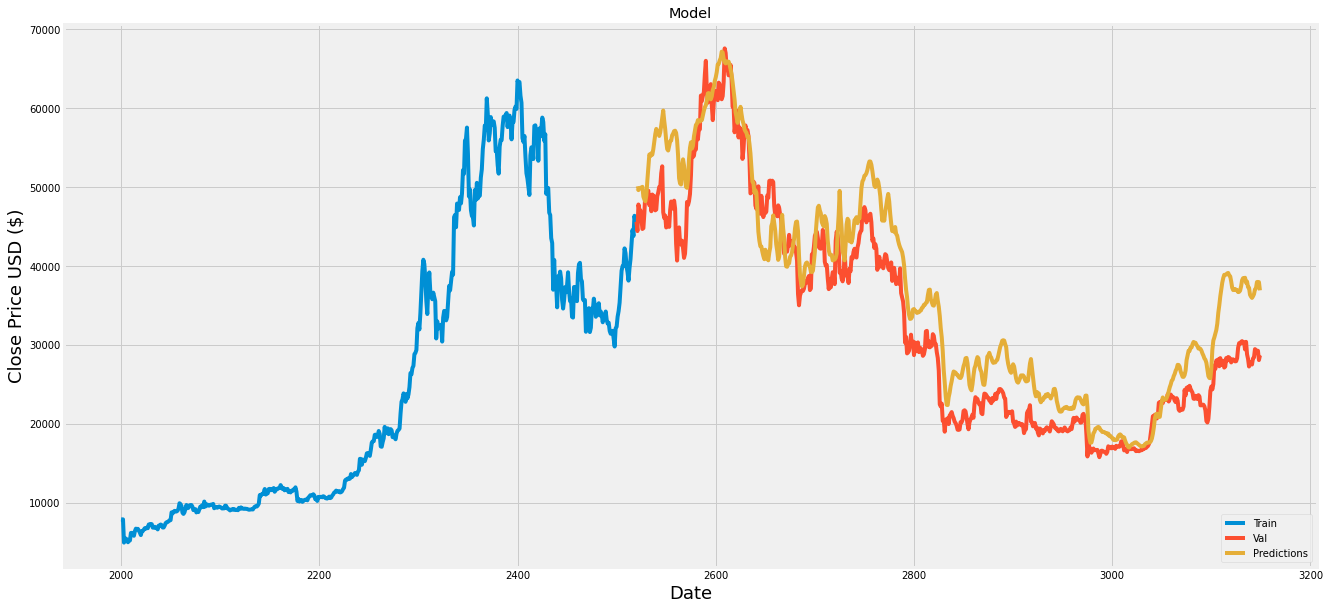

In [28]:
#plot zoomed in
train = data[2000:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
#show the valid and predicted prices
valid

,Close,Predictions
2520,45593.636719,49804.867188
2521,44428.289063,49855.609375
2522,47793.320313,49619.269531
2523,47096.945313,49861.121094
2524,47047.003906,49912.292969
...,...,...
3145,29340.261719,37181.746094
3146,29248.488281,37979.000000
3147,29268.806641,37985.433594
3148,28091.568359,37965.839844
